The aim of this project is to make a model that Based on the data of eight indicators of a set of users given in the data source, to classify each user in the dataset as a UBE(users with bad experience) or a UGE(users with good experience) according to the provided 8 indicators with ML/DL methods

# PREPOCESSING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import glob 

import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
print("libraries loaded ... !")

libraries loaded ... !


In [2]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#function for merging csv files into 1 csv file
def collectdata(path,code):
    all_files = glob.glob(path + "/*.csv")
    li = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df["user"] = str(filename)
        li.append(df)
        
    df = pd.concat(li, axis=0, ignore_index=True)
    if not "pred" in df.columns:
        df["pred"] = str(code)
    
    return df

#function for merging UBE and UGE into 1 csv & first feature selection by dropping irrelevant attributes
def mergedata(pathA,pathB):
    d0 = collectdata(pathA,"UBE") #UBE is 0
    d1 = collectdata(pathB,"UGE") #UGE is 1
    df = pd.concat([d0,d1])

    df.dropna(inplace=True)

    return df

#google drive links to datasets
path1 = "/content/drive/MyDrive/datatset/trainset/UBE" 
path2 = "/content/drive/MyDrive/datatset/trainset/UGE" 
path3 = "/content/drive/MyDrive/datatset/testset/UBE"
path4 = "/content/drive/MyDrive/datatset/testset/UGE"
path5 = "/content/drive/MyDrive/datatset/validationset/UBE"
path6 = "/content/drive/MyDrive/datatset/validationset/UGE"

print("function for loading data created ... !")

function for loading data created ... !


In [4]:
train = mergedata(path1,path2)             
test =  mergedata(path3,path4)       
validation =  mergedata(path5,path6) 
print("train, test and validation dataframes set!")

train, test and validation dataframes set!


In [5]:
clean_column=['indicator1', 'indicator2', 'indicator3', 'indicator4','indicator5', 'indicator6', 'indicator7', 'indicator8', 'pred']
df=train[clean_column]

df.shape

(3687372, 9)

In [6]:
features=['indicator1', 'indicator2', 'indicator3', 'indicator4', 'indicator5','indicator6', 'indicator7', 'indicator8']
X=df[features]
y=df[['pred']]
print("shape of X is ",X.shape,"and shape of y is ", y.shape)

shape of X is  (3687372, 8) and shape of y is  (3687372, 1)


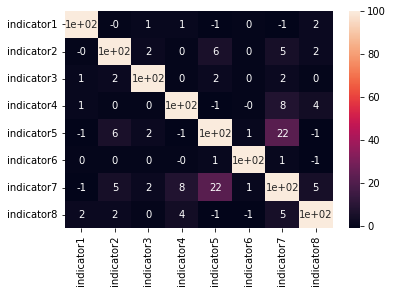

In [7]:
sns.heatmap(round(X.corr()*100,0), annot=True);

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)
#X=X.abs()

le = LabelEncoder()
y = le.fit_transform(y)

print("X", X.shape,"\n\n y", y.shape)

print("scaled and encoded the dataframe ...!")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X (3687372, 8) 

 y (3687372,)
scaled and encoded the dataframe ...!


In [9]:
#encoding 
encoder = LabelEncoder()

    
#Selecting X features and Y labels
X = pd.DataFrame(X)
X.columns=['indicator1', 'indicator2', 'indicator3', 'indicator4','indicator5', 'indicator6', 'indicator7', 'indicator8']
y_label = y
print(X.shape,y.shape)

print("more encoding and transformation ...!")

(3687372, 8) (3687372,)
more encoding and transformation ...!


In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print("more scaling ... !")

(3687372, 8)
more scaling ... !


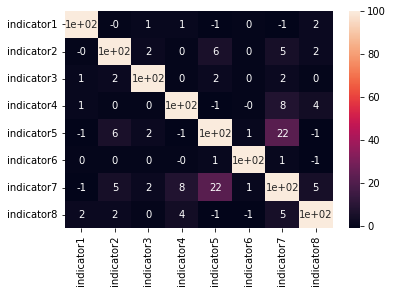

In [11]:
sns.heatmap(round(df.corr()*100,0), annot=True);

In [12]:
X = pd.DataFrame(X)
X.columns=['indicator1', 'indicator2', 'indicator3', 'indicator4','indicator5', 'indicator6', 'indicator7', 'indicator8']
print("returning dataframe from numpy ...!")

returning dataframe from numpy ...!


# CHOOSING IMPORTANT FEATURES

(921843, 8)
(921843,)
Intercept 0.4905956501290324
Coef [-1.00558949  0.90940744  0.17150452  0.10033706 -0.12112844 -0.27438965
  0.11406186  0.05003969]
Feature: 0, Score: -1.00559
Feature: 1, Score: 0.90941
Feature: 2, Score: 0.17150
Feature: 3, Score: 0.10034
Feature: 4, Score: -0.12113
Feature: 5, Score: -0.27439
Feature: 6, Score: 0.11406
Feature: 7, Score: 0.05004


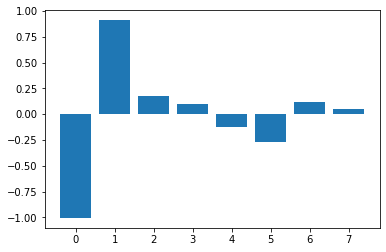

In [13]:
X_train, X_test, y_train, y_test =train_test_split(X,y_label)
print(X_test.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept",model.intercept_)
print("Coef", model.coef_)

importance = model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [14]:
new_features=['indicator2', 'indicator3', 'indicator4', 'indicator7', 'indicator8']
X_features=X[new_features]
print(X_features.shape)

(3687372, 5)


(921843, 5)
(921843,)
Intercept 0.48794710516222367
Coef [0.89453068 0.08875245 0.07998492 0.10476338 0.04948712]
Feature: 0, Score: 0.89453
Feature: 1, Score: 0.08875
Feature: 2, Score: 0.07998
Feature: 3, Score: 0.10476
Feature: 4, Score: 0.04949


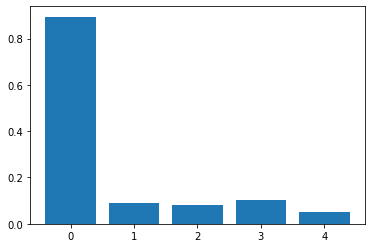

In [15]:
X_train, X_test, y_train, y_test =train_test_split(X_features,y_label)
print(X_test.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept",model.intercept_)
print("Coef", model.coef_)

importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# MODELING

visualize dataset distribution


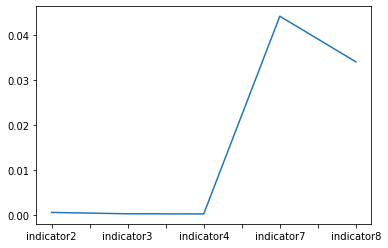

In [16]:
print("visualize dataset distribution")
X_train.mean().plot();

In [17]:
#fitting a decision tree
my_decision=LogisticRegression(random_state = 1000)
my_decision.fit(X_train,y_train)
y_pred=my_decision.predict(X_test)
score_dt=accuracy_score(y_test,y_pred)
print(score_dt)

print(f1_score(y_test, y_pred))

0.5130027564346641
0.27752055502179823


In [18]:
#testing its performance on train
print(my_decision.score(X_train,y_train))
print(my_decision.score(X_test,y_test))

0.512790862073766
0.5130027564346641


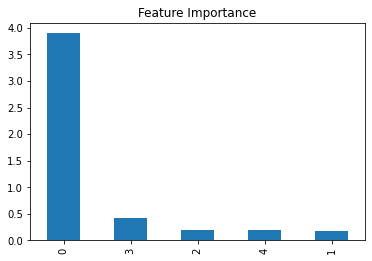

In [19]:
#checking feature importance on a log model
clf = LogisticRegression(random_state=1)

#features = df1.iloc[:,0:2]
X=pd.get_dummies(X_train[new_features])

y=y_train

clf.fit(X,y)

importance = clf.coef_[0]

feat_importances = pd.Series(importance)
feat_importances.nlargest(50).plot(kind='bar',title = 'Feature Importance');

In [20]:
#fitting XGBClassifier
model = XGBClassifier(importance_type='gain',
              learning_rate=0.95, max_depth=5,
              n_estimators=1_00, random_state=0,
              )
evalset =[(X_train,y_train),(X_test,y_test)]
model.fit(X_train,y_train, eval_metric='logloss',eval_set=evalset)

[0]	validation_0-logloss:0.686818	validation_1-logloss:0.689241
[1]	validation_0-logloss:0.690697	validation_1-logloss:0.68845
[2]	validation_0-logloss:0.68841	validation_1-logloss:0.687794
[3]	validation_0-logloss:0.685369	validation_1-logloss:0.685179
[4]	validation_0-logloss:0.684637	validation_1-logloss:0.68463
[5]	validation_0-logloss:0.682614	validation_1-logloss:0.683981
[6]	validation_0-logloss:0.681682	validation_1-logloss:0.682637
[7]	validation_0-logloss:0.682544	validation_1-logloss:0.682531
[8]	validation_0-logloss:0.681649	validation_1-logloss:0.682293
[9]	validation_0-logloss:0.681229	validation_1-logloss:0.681685
[10]	validation_0-logloss:0.681182	validation_1-logloss:0.68138
[11]	validation_0-logloss:0.680511	validation_1-logloss:0.681059
[12]	validation_0-logloss:0.680247	validation_1-logloss:0.680428
[13]	validation_0-logloss:0.679649	validation_1-logloss:0.680522
[14]	validation_0-logloss:0.679705	validation_1-logloss:0.680337
[15]	validation_0-logloss:0.679549	vali

XGBClassifier(learning_rate=0.95, max_depth=5, n_estimators=1000)

In [45]:
#testing its accuracy
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
yhat_test=clf.predict(X_test)
valid_f = f1_score(yhat_test, y_test)
print(f"Train f1 Score: {valid_f}")

Accuracy: 0.557
Train f1 Score: 0.27752055502179823


In [ ]:
#more metrics on the XGBClassifier with a graphing
results = model.evals_result()
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.legend()
pyplot.show()

In [46]:
#more metrics on the XGBClassifier
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58    465709
           1       0.56      0.50      0.53    456134

    accuracy                           0.56    921843
   macro avg       0.56      0.56      0.56    921843
weighted avg       0.56      0.56      0.56    921843



In [47]:
#saving model
import joblib
import pickle

filename = "Completed_model.joblib"
joblib.dump(model, filename)


['Completed_model.joblib']

In [48]:
#test model
loaded_model = joblib.load(filename)

test_y = test.pred
test_y = le.fit_transform(test_y)
test_X = test[new_features]

result = loaded_model.score(test_X, test_y)
y_hat_test=clf.predict(test_X)
valid_f0 = f1_score(y_hat_test, test_y)

print(f"Train f1 Score: {valid_f0}")
print("accuracy score : ",result)

Train f1 Score: 0.6110304797899175
accuracy score :  0.5234660829839084


In [49]:
#validating model
loaded_model = joblib.load(filename)

valid_y = validation.pred
valid_y = le.fit_transform(valid_y)
valid_X = validation[new_features]

result = loaded_model.score(valid_X, valid_y)
y_hat_valid=clf.predict(valid_X)
valid_f1 = f1_score(valid_y, y_hat_valid)

print(f"Train f1 Score: {valid_f1}")
print("Accuracy score : ",result)

Train f1 Score: 0.6663083712278484
Accuracy score :  0.49055791341680216


# CONCLUSION

The model is able to predict 58% on train, 61% on test and 66% on validation using f1 score.

The major challenge I had when I used the semi supervised learning model approach was that I would run out of my 16GB memory therefore I could not proceed with that model instead this approach uses a supervised model. There is room for people with a more powerful hardware to explore the semi supervised approach which I believe will achieve a greater accuracy and precision
